# 사용자 기반 협업 필터링

사용자들의 관심사를 토대로 어떤 사용자에게 새로운 관심사를 추천하는 방법에 대해 살펴봅니다.

In [88]:
import math
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

사용자들의 관심사를 2차원 배열로 저장합니다. user_interests[i]는 i번째 사용자의 관심사 목록을 나타냅니다.

In [82]:
users_interests = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

## 사용자들 간의 유사도 계산

사용자들 간의 유사도를 정의합니다. v와 w는 두 사용자 각각의 관심사 벡터입니다.

In [70]:
def cosine_similarity(v, w):
    return np.dot(v, w) / math.sqrt(np.dot(v, v) * np.dot(w, w))

각각의 관심사에 인덱스를 부여합니다.

In [83]:
unique_interests = sorted(list({ interest for user_interests in users_interests for interest in user_interests }))
print(unique_interests)

['Big Data', 'C++', 'Cassandra', 'HBase', 'Hadoop', 'Haskell', 'Java', 'Mahout', 'MapReduce', 'MongoDB', 'MySQL', 'NoSQL', 'Postgres', 'Python', 'R', 'Spark', 'Storm', 'artificial intelligence', 'databases', 'decision trees', 'deep learning', 'libsvm', 'machine learning', 'mathematics', 'neural networks', 'numpy', 'pandas', 'probability', 'programming languages', 'regression', 'scikit-learn', 'scipy', 'statistics', 'statsmodels', 'support vector machines', 'theory']


각 사용자의 관심사 벡터를 만듭니다.

In [62]:
def make_user_interest_vector(user_interests):
    return [1 if interest in user_interests else 0 for interest in unique_interests]

사용자들의 관심사를 행렬로 만듭니다.

In [84]:
user_interest_matrix = list(map(make_user_interest_vector, users_interests))
print(user_interest_matrix)

[[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0,

사용자들 간의 유사도를 계산합니다.

In [93]:
user_similarities = [[round(cosine_similarity(interest_vector_i, interest_vector_j), 2) for interest_vector_j in user_interest_matrix] for interest_vector_i in user_interest_matrix]
print(user_similarities)

[[1.0, 0.34, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.19, 0.57, 0.0, 0.0, 0.0, 0.17, 0.0], [0.34, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 0.0], [0.0, 0.0, 1.0, 0.18, 0.0, 0.17, 0.0, 0.2, 0.0, 0.0, 0.24, 0.0, 0.47, 0.0, 0.0], [0.0, 0.0, 0.18, 1.0, 0.22, 0.37, 0.45, 0.0, 0.0, 0.0, 0.52, 0.22, 0.52, 0.0, 0.26], [0.0, 0.0, 0.0, 0.22, 1.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.58], [0.15, 0.0, 0.17, 0.37, 0.0, 1.0, 0.0, 0.0, 0.0, 0.2, 0.24, 0.2, 0.47, 0.0, 0.0], [0.0, 0.0, 0.0, 0.45, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.29, 0.25, 0.0, 0.0, 0.0], [0.0, 0.0, 0.2, 0.0, 0.25, 0.0, 0.0, 1.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 1.0, 0.25, 0.0, 0.5, 0.0, 0.0, 0.0], [0.57, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.25, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.24, 0.52, 0.0, 0.24, 0.29, 0.0, 0.0, 0.0, 1.0, 0.0, 0.33, 0.0, 0.0], [0.0, 0.0, 0.0, 0.22, 0.0, 0.2, 0.25, 0.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.47, 0.52, 0.0, 0.47

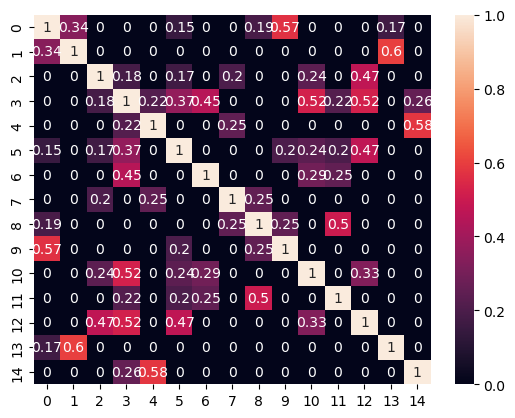

In [94]:
hm = sns.heatmap(data = user_similarities, annot=True)
plt.show()

한 사용자와 가장 유사한 사용자들을 구합니다.

In [86]:
def most_similar_users_to(user_id):
    pairs = [(other_user_id, similarity) for other_user_id, similarity in enumerate(user_similarities[user_id]) if user_id != other_user_id and similarity > 0]
    
    return sorted(pairs, key=lambda x : x[1], reverse=True)

print(most_similar_users_to(0))

[(9, 0.5669467095138409), (1, 0.3380617018914066), (8, 0.1889822365046136), (13, 0.1690308509457033), (5, 0.1543033499620919)]


## 추천 방법

각각의 관심사에 대해 다른 사용자의 유사도를 모두 더합니다.

In [68]:
def user_based_suggestions(user_id, include_current_interests=False):
    suggestions = defaultdict(float)
    for other_user_id, similarity in most_similar_users_to(user_id):
        for interest in users_interests[other_user_id]:
            suggestions[interest] += similarity
            
    suggestions = sorted(suggestions.items(), key=lambda x : x[1], reverse=True)
    
    if include_current_interests:
        return suggestions
    else:
        return [(suggestion, weight) for suggestion, weight in suggestions if suggestion not in users_interests[user_id]]

In [87]:
suggestions = user_based_suggestions(0)
print(suggestions)

[('MapReduce', 0.5669467095138409), ('MongoDB', 0.50709255283711), ('Postgres', 0.50709255283711), ('NoSQL', 0.3380617018914066), ('neural networks', 0.1889822365046136), ('deep learning', 0.1889822365046136), ('artificial intelligence', 0.1889822365046136), ('databases', 0.1690308509457033), ('MySQL', 0.1690308509457033), ('Python', 0.1543033499620919), ('R', 0.1543033499620919), ('C++', 0.1543033499620919), ('Haskell', 0.1543033499620919), ('programming languages', 0.1543033499620919)]
